In [1]:
using Pkg

In [2]:
Pkg.add("Plots");

   Updating registry at `~/data/Jupyter-data-science-environment/.julia_pkgs/registries/General`
  Resolving package versions...
   Updating `~/data/Jupyter-data-science-environment/.julia_pkgs/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/data/Jupyter-data-science-environment/.julia_pkgs/environments/v1.4/Manifest.toml`
 [no changes]


In [3]:
Pkg.add("RCall")
Pkg.build("RCall")

  Resolving package versions...
   Updating `~/data/Jupyter-data-science-environment/.julia_pkgs/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/data/Jupyter-data-science-environment/.julia_pkgs/environments/v1.4/Manifest.toml`
 [no changes]
   Building Conda → `~/data/Jupyter-data-science-environment/.julia_pkgs/packages/Conda/3rPhK/deps/build.log`
   Building RCall → `~/data/Jupyter-data-science-environment/.julia_pkgs/packages/RCall/Qzssx/deps/build.log`


In [4]:
using RCall

┌ Info: Precompiling RCall [6f49c342-dc21-5d91-9882-a32aef131414]
└ @ Base loading.jl:1260


In [5]:
z = 1

1

In [6]:
@rput z

1

In [7]:
R"rnorm(10)"

RObject{RealSxp}
 [1] -0.03903900  1.10887162 -0.05071839 -0.25992156 -0.30123067  0.13890034
 [7] -0.74582903  0.19744705  1.98762147  0.69460537


In [8]:
x = randn(10)

10-element Array{Float64,1}:
 -0.6362351300407042
  1.5751856264531718
 -0.904697691230928
 -0.49777290794497947
 -0.5492277581318749
 -1.0432496959451674
  0.9848463526075178
  0.5995188410902887
 -1.3272666853576252
  0.4690337216972202

In [9]:
R"t.test($x)"

RObject{VecSxp}

	One Sample t-test

data:  `#JL`$x
t = -0.43333, df = 9, p-value = 0.675
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.8272228  0.5612497
sample estimates:
 mean of x 
-0.1329865 



In [10]:
R"optim(0, $(x -> x-cos(x)), method='BFGS')"

RObject{VecSxp}
$par
[1] -1.56343

$value
[1] -1.570796

$counts
function gradient 
      14       13 

$convergence
[1] 0

$message
NULL



In [11]:
using Markdown
macro bind(def, element)
    quote
        local el = $(esc(element))
        global $(esc(def)) = Core.applicable(Base.peek, el) ? Base.peek(el) : missing
        el
    end
end

@bind (macro with 1 method)

In [12]:
begin 
	n_timepoints = 500
	time_first_inf = 30
	n_first_inf = 20
	n_pop = 10000
	time_recovery = 1
	""
end

""

In [13]:
begin
	function forward_outbreak(; r_inf=0.05, r_dec=0.01, r_rec=0.01, r_vac=0.1)
		susc = zeros(n_timepoints)
		inf = zeros(n_timepoints)
		rec = zeros(n_timepoints)
		dec= zeros(n_timepoints)
		susc[1:time_first_inf] = ones(time_first_inf) * n_pop * (1 - r_vac)
		rec[1:time_first_inf] = ones(time_first_inf) * n_pop * r_vac
		# model 
		for t in (time_recovery + 1):n_timepoints
			susc[t] = susc[t - 1] - r_inf * inf[t - 1] * susc[t - 1] / n_pop
			if t == time_first_inf
				inf[t] = n_first_inf
			else
				inf[t] = inf[t - 1] + r_inf * inf[t - 1] * susc[t - 1] / n_pop - r_rec * inf[t - time_recovery] - r_dec * inf[t - time_recovery]
			end
			rec[t] = rec[t - 1] + r_rec * inf[t - time_recovery]
			dec[t] = dec[t - 1] + r_dec * inf[t - time_recovery]
		end
		return (susc, inf, rec, dec)
	end
	md"## SIR Model
	
	Very interesting stuff!! Check colourful plots below"
end

## SIR Model

```
Very interesting stuff!! Check colourful plots below
```


In [14]:
begin
	inf_slider = @bind rate_inf html"<input type='range' min='0.0' max='1' step='0.01' value='0.15'>"
	rec_slider = @bind rate_rec html"<input type='range' min='0.0' max='1' step='0.01' value='0.04'>"
	dec_slider = @bind rate_dec html"<input type='range' min='0.0' max='1' step='0.01' value='0.02'>"
	vac_slider = @bind rate_vac html"<input type='range' min='0.0' max='1' step='0.01' value='0.0'>"
	
	md"""**Please set model parameters:**
	
	Infection rate: $(inf_slider)
	
	Recovery rate: $rec_slider
	
	Decease rate: $(dec_slider)
	Vaccination rate: $(vac_slider)
	"""
end

**Please set model parameters:**

Infection rate: HTML{String}("<input type='range' min='0.0' max='1' step='0.01' value='0.15'>")

Recovery rate: HTML{String}("<input type='range' min='0.0' max='1' step='0.01' value='0.04'>")

Decease rate: HTML{String}("<input type='range' min='0.0' max='1' step='0.01' value='0.02'>") Vaccination rate: HTML{String}("<input type='range' min='0.0' max='1' step='0.01' value='0.0'>")


In [15]:
begin
	
	survival = rate_rec / (rate_rec + rate_dec)
	reproduction = rate_inf / (rate_rec + rate_dec)
	
	md"""Currently $R_0$ = $(round(reproduction, digits=3)), and survival fraction is $(round(survival, digits=3)). Change parametesr below to alter"""
end

Currently $R_0$ = missing, and survival fraction is missing. Change parametesr below to alter


In [16]:
begin
	using Plots
	md""" # Bonjour"""
end

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


# Bonjour


In [17]:
Pkg.add("PlutoUI")

  Resolving package versions...
  Installed PlutoUI ─ v0.4.0
   Updating `~/data/Jupyter-data-science-environment/.julia_pkgs/environments/v1.4/Project.toml`
  [7f904dfe] + PlutoUI v0.4.0
   Updating `~/data/Jupyter-data-science-environment/.julia_pkgs/environments/v1.4/Manifest.toml`
  [7f904dfe] + PlutoUI v0.4.0


In [18]:
using PlutoUI

┌ Info: Precompiling PlutoUI [7f904dfe-b85e-4ff6-b463-dae2292396a8]
└ @ Base loading.jl:1260


In [19]:
apples = [15, 25, 80, 75, 50, 30, 35, 15, 25, 35]
years = 2001:2010
oranges = rand(1:100, 10)

10-element Array{Int64,1}:
 87
 29
 70
 62
 83
 81
 95
 18
 37
 93

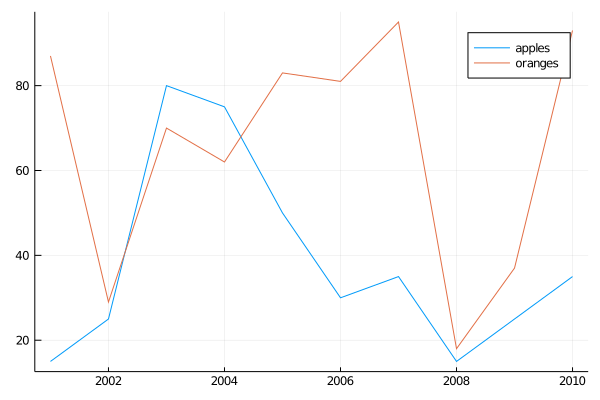

In [20]:
begin
	plot(years, apples, label = "apples")
	plot!(years, oranges, label = "oranges")
end

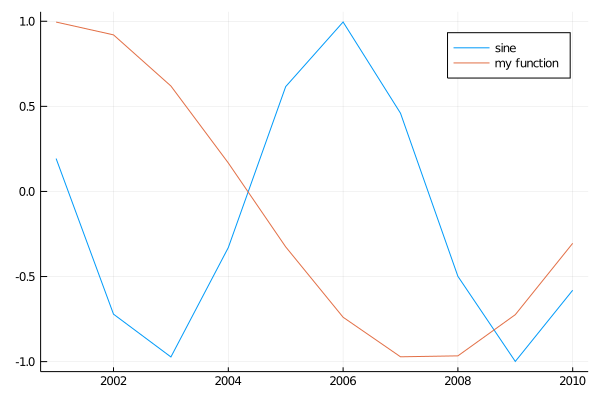

In [21]:
begin
	function myfunction(x)
		return sin(x/2)
	end
	plot(years, sin, label = "sine")
	plot!(years, myfunction, label = "my function")
end

In [22]:
using Markdown
macro bind(def, element)
    quote
        local el = $(esc(element))
        global $(esc(def)) = Core.applicable(Base.peek, el) ? Base.peek(el) : missing
        el
    end
end

@bind (macro with 1 method)

In [23]:
begin
	🐶slider = @bind 🐶 html"<input type='range'>"
	🐱slider = @bind 🐱 html"<input type='range'>"
	
	md"""**How many pets do you have?**
	
	Dogs: $(🐶slider)
	Cats: $(🐱slider)"""
end

**How many pets do you have?**

Dogs: HTML{String}("<input type='range'>") Cats: HTML{String}("<input type='range'>")


In [24]:
@bind x html"<input type='range' min='5' max'15'>"

HTML{String}("<input type='range' min='5' max'15'>")

In [25]:
@bind x Slider(5:15)

Slider(5:15, 5)

In [26]:
md"""
`a = ` $(@bind a html"<input type='range' >")
`b = ` $(@bind b html"<input type='text' >")
`c = ` $(@bind c html"<input type='button' value='Click'>")
`d = ` $(@bind d html"<input type='checkbox' >")
`e = ` $(@bind e html"<select><option value='one'>First</option><option value='two'>Second</option></select>")
`f = ` $(@bind f html"<input type='color' >")
"""

`a =` HTML{String}("<input type='range' >") `b =` HTML{String}("<input type='text' >") `c =` HTML{String}("<input type='button' value='Click'>") `d =` HTML{String}("<input type='checkbox' >") `e =` HTML{String}("<select><option value='one'>First</option><option value='two'>Second</option></select>") `f =` HTML{String}("<input type='color' >")


In [27]:
function plot_traj(X)
    Plots.plot(X[1, :]*1e-3, X[2, :]*1e-3, legend = false)
    xlabel!("X [km]")
    ylabel!("Y [km]")
end

function plot_altitude(X, t_sim)
    R = zeros(length(t_sim))
    for i = 1:length(t_sim)
        R[i] = (sqrt(X[1, i]^2+X[2, i]^2+X[3, i]^2)-(3389.5*1e3))
    end
    Plots.plot(t_sim, R*1e-3, legend=false, xtickfont = font(9), xguidefontsize=15, ytickfont = font(8), yguidefontsize=13, linewidth = 3.0)
    xlabel!("time [s]")
    ylabel!("Altitude [km]")
end

plot_altitude (generic function with 1 method)